## For download the dataset, please visit: https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction

In [222]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
import warnings

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import *
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.naive_bayes import GaussianNB

warnings.filterwarnings("ignore")

In [223]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')
df_train.drop(['Unnamed: 0','id'],axis=1,inplace=True)
df_test.drop(['Unnamed: 0','id'],axis=1,inplace=True)

print('train dataset size:',len(df_train))
print('test dataset size:',len(df_test))

train dataset size: 103904
test dataset size: 25976


In [224]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

In [225]:
df_train.isna().sum().sort_values(ascending=False)

Arrival Delay in Minutes             310
satisfaction                           0
Food and drink                         0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Gender                                 0
dtype: int64

In [226]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             25976 non-null  object 
 1   Customer Type                      25976 non-null  object 
 2   Age                                25976 non-null  int64  
 3   Type of Travel                     25976 non-null  object 
 4   Class                              25976 non-null  object 
 5   Flight Distance                    25976 non-null  int64  
 6   Inflight wifi service              25976 non-null  int64  
 7   Departure/Arrival time convenient  25976 non-null  int64  
 8   Ease of Online booking             25976 non-null  int64  
 9   Gate location                      25976 non-null  int64  
 10  Food and drink                     25976 non-null  int64  
 11  Online boarding                    25976 non-null  int

In [227]:
df_test.isna().sum().sort_values(ascending=False)

Arrival Delay in Minutes             83
satisfaction                          0
Food and drink                        0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Gender                                0
dtype: int64

In [228]:
df_train.describe().T

count         mean         std   min  \
Age                                103904.0    39.379706   15.114964   7.0   
Flight Distance                    103904.0  1189.448375  997.147281  31.0   
Inflight wifi service              103904.0     2.729683    1.327829   0.0   
Departure/Arrival time convenient  103904.0     3.060296    1.525075   0.0   
Ease of Online booking             103904.0     2.756901    1.398929   0.0   
Gate location                      103904.0     2.976883    1.277621   0.0   
Food and drink                     103904.0     3.202129    1.329533   0.0   
Online boarding                    103904.0     3.250375    1.349509   0.0   
Seat comfort                       103904.0     3.439396    1.319088   0.0   
Inflight entertainment             103904.0     3.358158    1.332991   0.0   
On-board service                   103904.0     3.382363    1.288354   0.0   
Leg room service                   103904.0     3.351055    1.315605   0.0   
Baggage handling                   103904.0     3.631833    1.180903   1.0   
Checkin service                    103904.0     3.304290    1.265396   0.0   
Inflight service                   103904.0     3.640428    1.175663   0.0   
Cleanliness                        103904.0     3.286351    1.312273   0.0   
Departure Delay in Minutes         103904.0    14.815618   38.230901   0.0   
Arrival Delay in Minutes           103594.0    15.178678   38.698682   0.0   

                                     25%    50%     75%     max  
Age                                 27.0   40.0    51.0    85.0  
Flight Distance                    414.0  843.0  1743.0  4983.0  
Inflight wifi service                2.0    3.0     4.0     5.0  
Departure/Arrival time convenient    2.0    3.0     4.0     5.0  
Ease of Online booking               2.0    3.0     4.0     5.0  
Gate location                        2.0    3.0     4.0     5.0  
Food and drink                       2.0    3.0     4.0     5.0  
Online boarding                      2.0    3.0     4.0     5.0  
Seat comfort                         2.0    4.0     5.0     5.0  
Inflight entertainment               2.0    4.0     4.0     5.0  
On-board service                     2.0    4.0     4.0     5.0  
Leg room service                     2.0    4.0     4.0     5.0  
Baggage handling                     3.0    4.0     5.0     5.0  
Checkin service                      3.0    3.0     4.0     5.0  
Inflight service                     3.0    4.0     5.0     5.0  
Cleanliness                          2.0    3.0     4.0     5.0  
Departure Delay in Minutes           0.0    0.0    12.0  1592.0  
Arrival Delay in Minutes             0.0    0.0    13.0  1584.0

In [229]:
df_test.describe().T

count         mean         std   min  \
Age                                25976.0    39.620958   15.135685   7.0   
Flight Distance                    25976.0  1193.788459  998.683999  31.0   
Inflight wifi service              25976.0     2.724746    1.335384   0.0   
Departure/Arrival time convenient  25976.0     3.046812    1.533371   0.0   
Ease of Online booking             25976.0     2.756775    1.412951   0.0   
Gate location                      25976.0     2.977094    1.282133   1.0   
Food and drink                     25976.0     3.215353    1.331506   0.0   
Online boarding                    25976.0     3.261665    1.355536   0.0   
Seat comfort                       25976.0     3.449222    1.320090   1.0   
Inflight entertainment             25976.0     3.357753    1.338299   0.0   
On-board service                   25976.0     3.385664    1.282088   0.0   
Leg room service                   25976.0     3.350169    1.318862   0.0   
Baggage handling                   25976.0     3.633238    1.176525   1.0   
Checkin service                    25976.0     3.314175    1.269332   1.0   
Inflight service                   25976.0     3.649253    1.180681   0.0   
Cleanliness                        25976.0     3.286226    1.319330   0.0   
Departure Delay in Minutes         25976.0    14.306090   37.423160   0.0   
Arrival Delay in Minutes           25893.0    14.740857   37.517539   0.0   

                                     25%    50%     75%     max  
Age                                 27.0   40.0    51.0    85.0  
Flight Distance                    414.0  849.0  1744.0  4983.0  
Inflight wifi service                2.0    3.0     4.0     5.0  
Departure/Arrival time convenient    2.0    3.0     4.0     5.0  
Ease of Online booking               2.0    3.0     4.0     5.0  
Gate location                        2.0    3.0     4.0     5.0  
Food and drink                       2.0    3.0     4.0     5.0  
Online boarding                      2.0    4.0     4.0     5.0  
Seat comfort                         2.0    4.0     5.0     5.0  
Inflight entertainment               2.0    4.0     4.0     5.0  
On-board service                     2.0    4.0     4.0     5.0  
Leg room service                     2.0    4.0     4.0     5.0  
Baggage handling                     3.0    4.0     5.0     5.0  
Checkin service                      3.0    3.0     4.0     5.0  
Inflight service                     3.0    4.0     5.0     5.0  
Cleanliness                          2.0    3.0     4.0     5.0  
Departure Delay in Minutes           0.0    0.0    12.0  1128.0  
Arrival Delay in Minutes             0.0    0.0    13.0  1115.0

# Exploratory Data Analysis

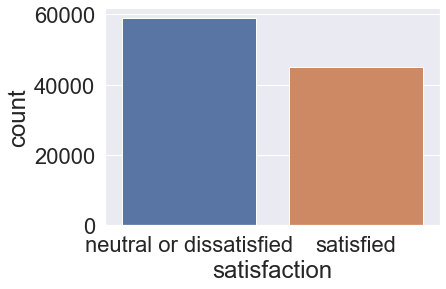

In [230]:
ax = sns.countplot(x="satisfaction", data=df_train)

In [231]:
numerics = ['int64','float64']

train_con_col = df_train.select_dtypes(include = numerics).columns
train_cat_col = df_train.select_dtypes(include = "object").columns
test_con_col = df_test.select_dtypes(include = numerics).columns
test_cat_col = df_test.select_dtypes(include = "object").columns

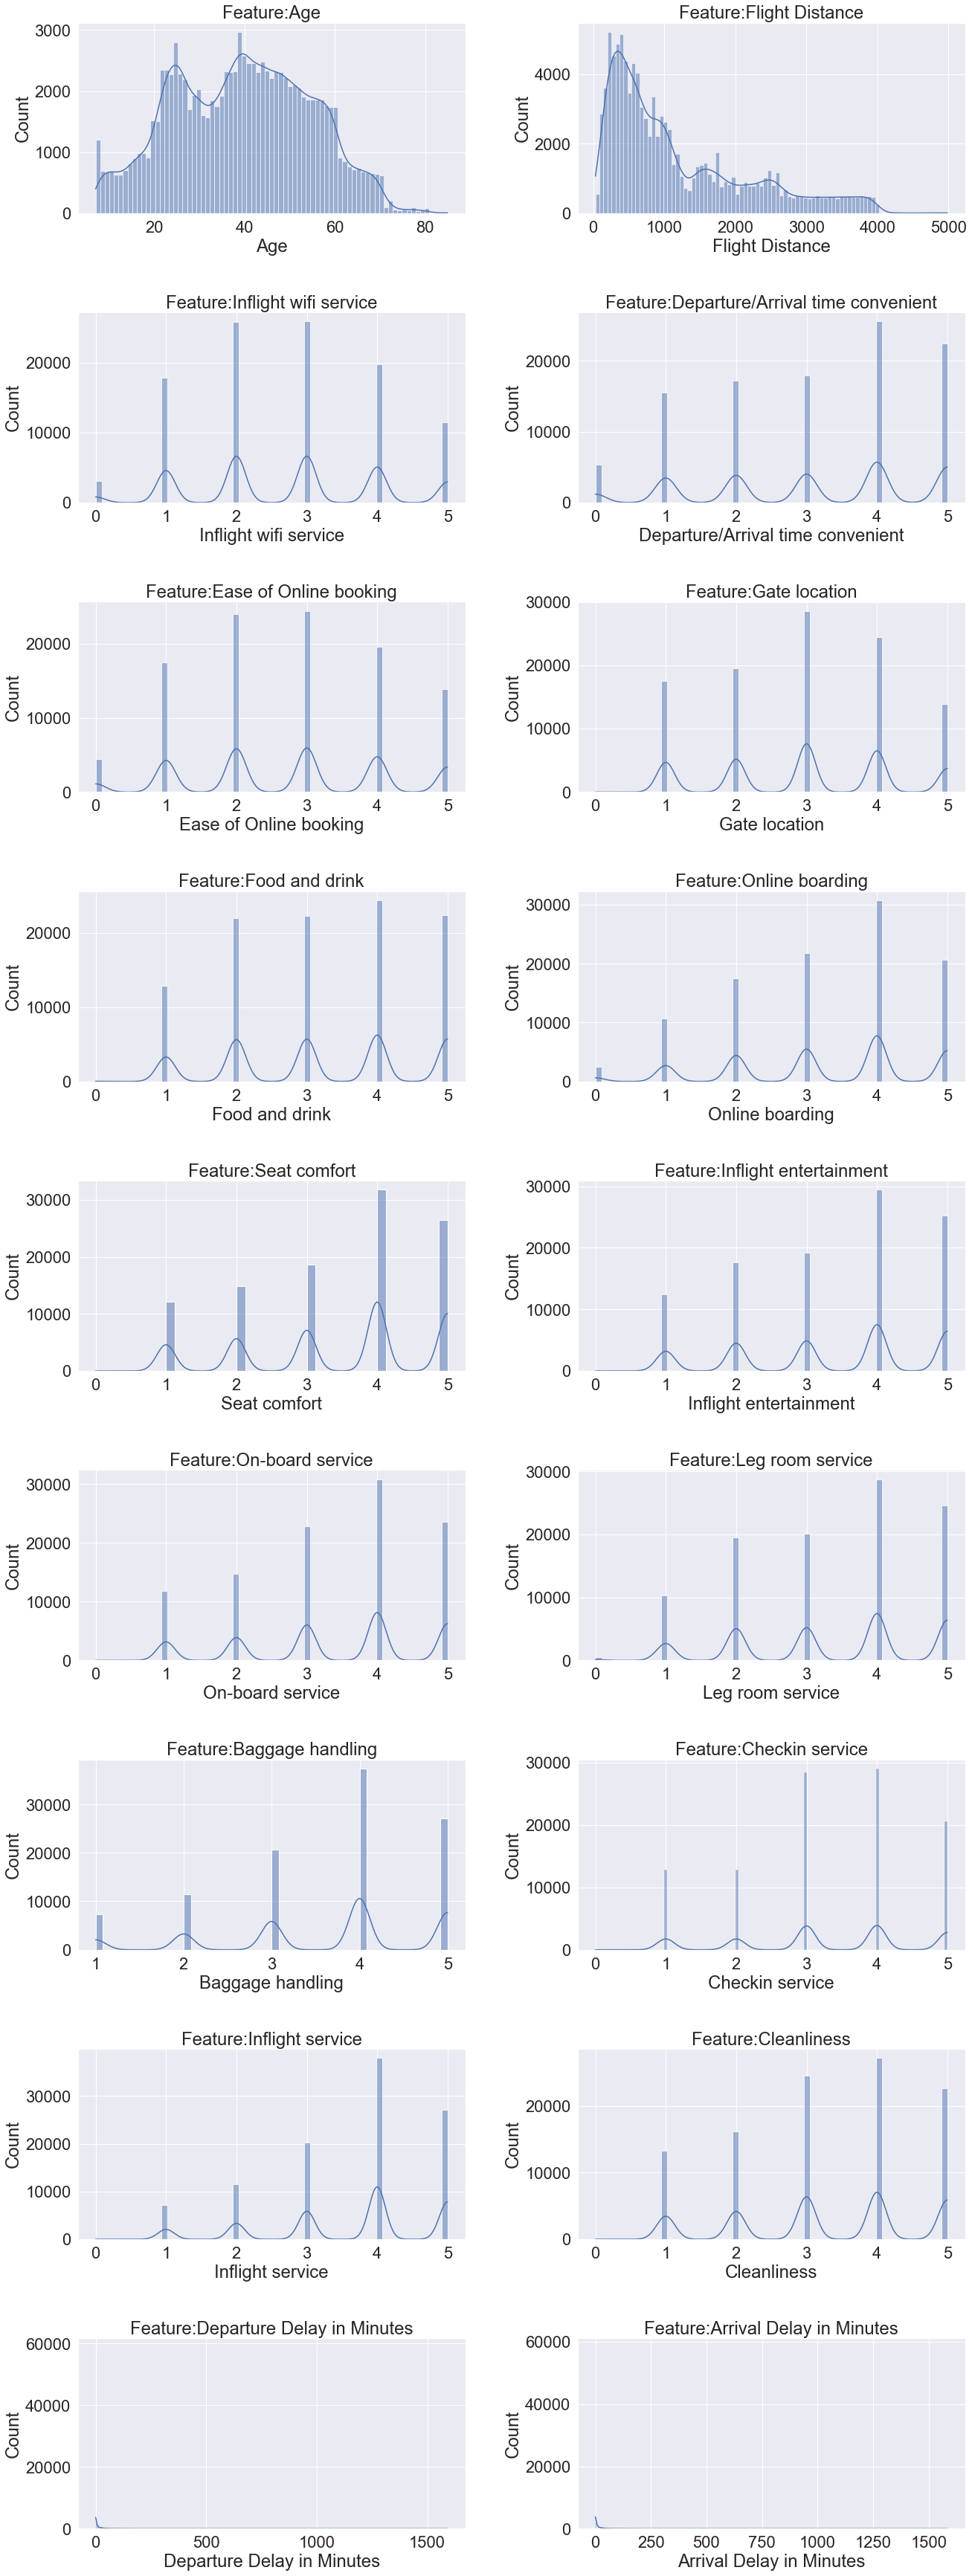

In [232]:
fig, axs = plt.subplots(9, 2, figsize=(20,50))
fig.tight_layout(pad=4.0)

for f,ax in zip(train_con_col,axs.ravel()):
    sns.set(font_scale = 2)
    ax=sns.histplot(ax=ax,data=df_train,x=df_train[f],kde=True)
    ax.set_title('Feature:'+ f)

<AxesSubplot:xlabel='Arrival Delay in Minutes', ylabel='Density'>

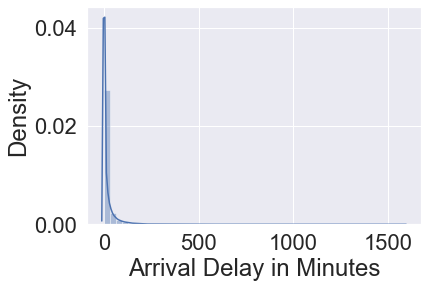

In [233]:
sns.distplot(df_train['Arrival Delay in Minutes'])

<AxesSubplot:xlabel='Departure Delay in Minutes', ylabel='Density'>

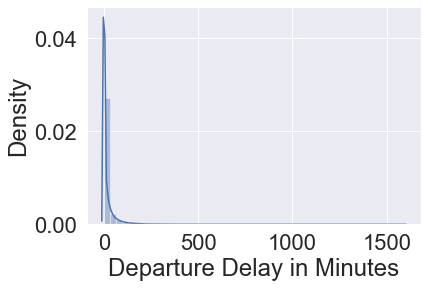

In [234]:
sns.distplot(df_train['Departure Delay in Minutes'])

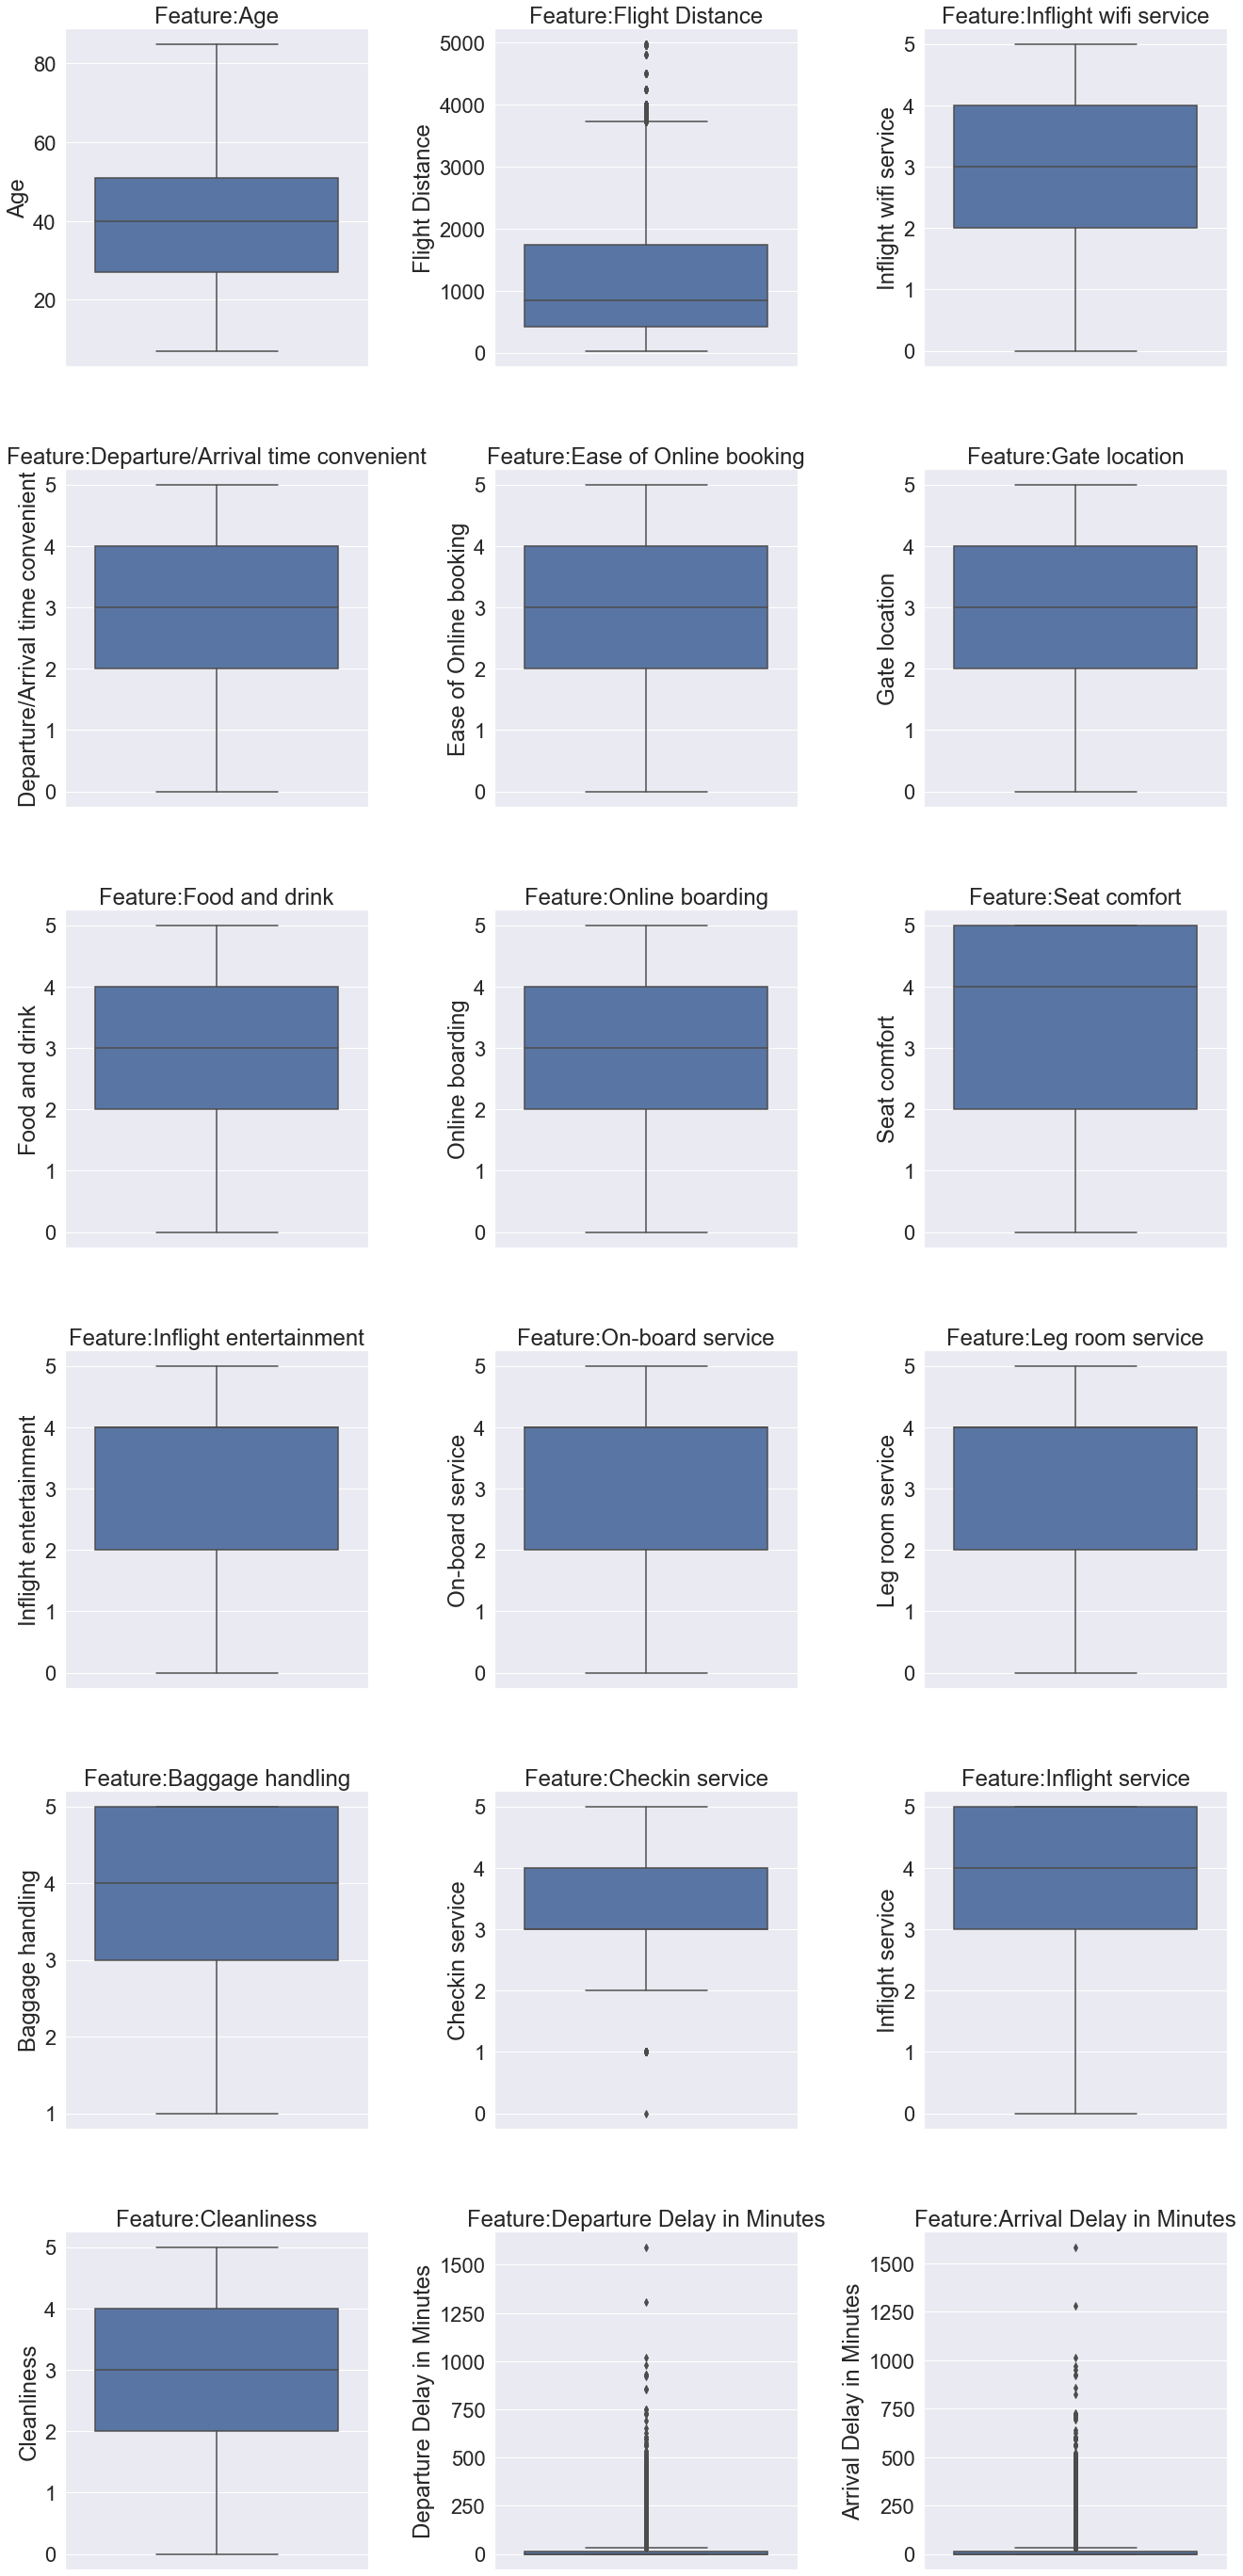

In [235]:
fig, axs = plt.subplots(6, 3, figsize=(20,40))
fig.tight_layout(pad=3.0)

for f,ax in zip(train_con_col,axs.ravel()):
    sns.set(font_scale = 2)
    ax=sns.boxplot(ax=ax,data=df_train,y=df_train[f])
    ax.set_title('Feature:'+ f)

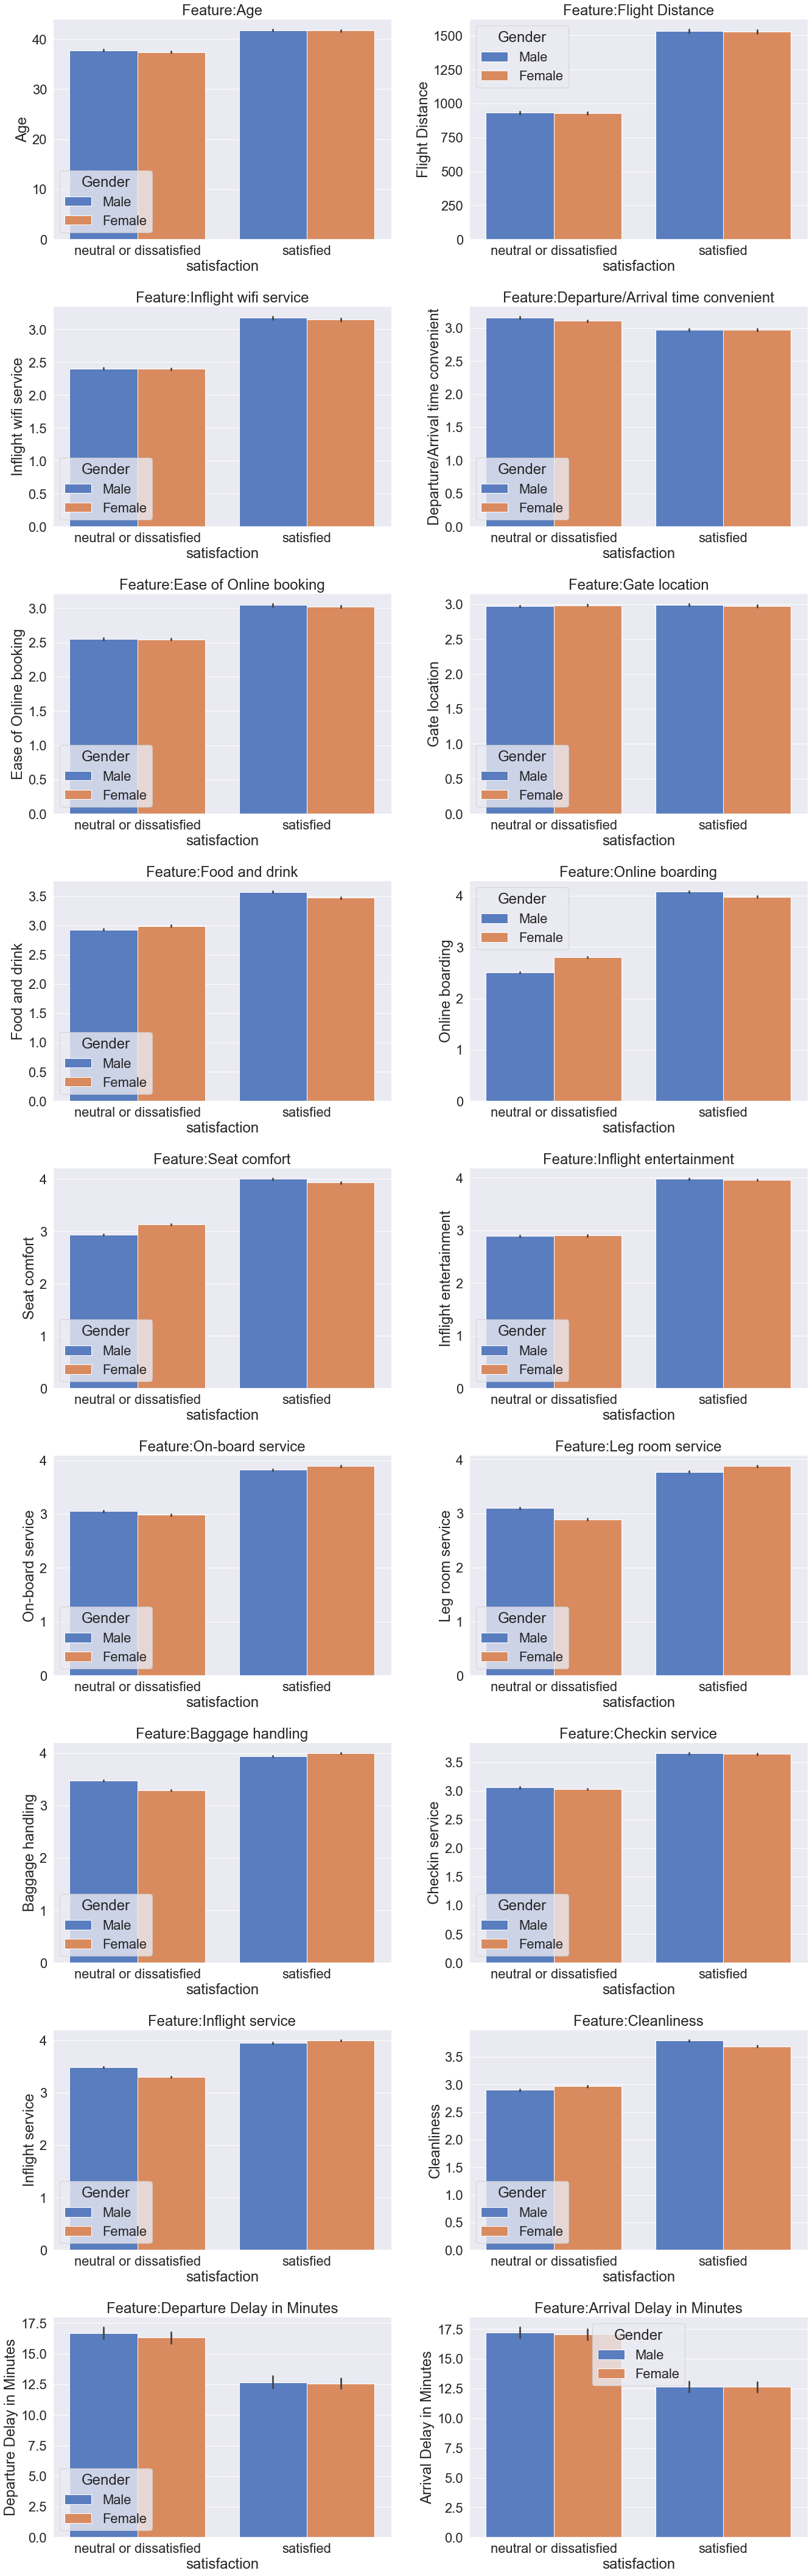

In [236]:
def detail_barplot(category):
    fig, axs = plt.subplots(9, 2, figsize=(20, 60))
    
    fig.tight_layout(pad=3.0)
    for feature,ax in zip(train_con_col,axs.ravel()):
        ax = sns.barplot(ax=ax,x="satisfaction", y=feature, hue=category,palette= 'muted', data=df_train)
        ax.set_title('Feature:'+ feature)

detail_barplot("Gender")

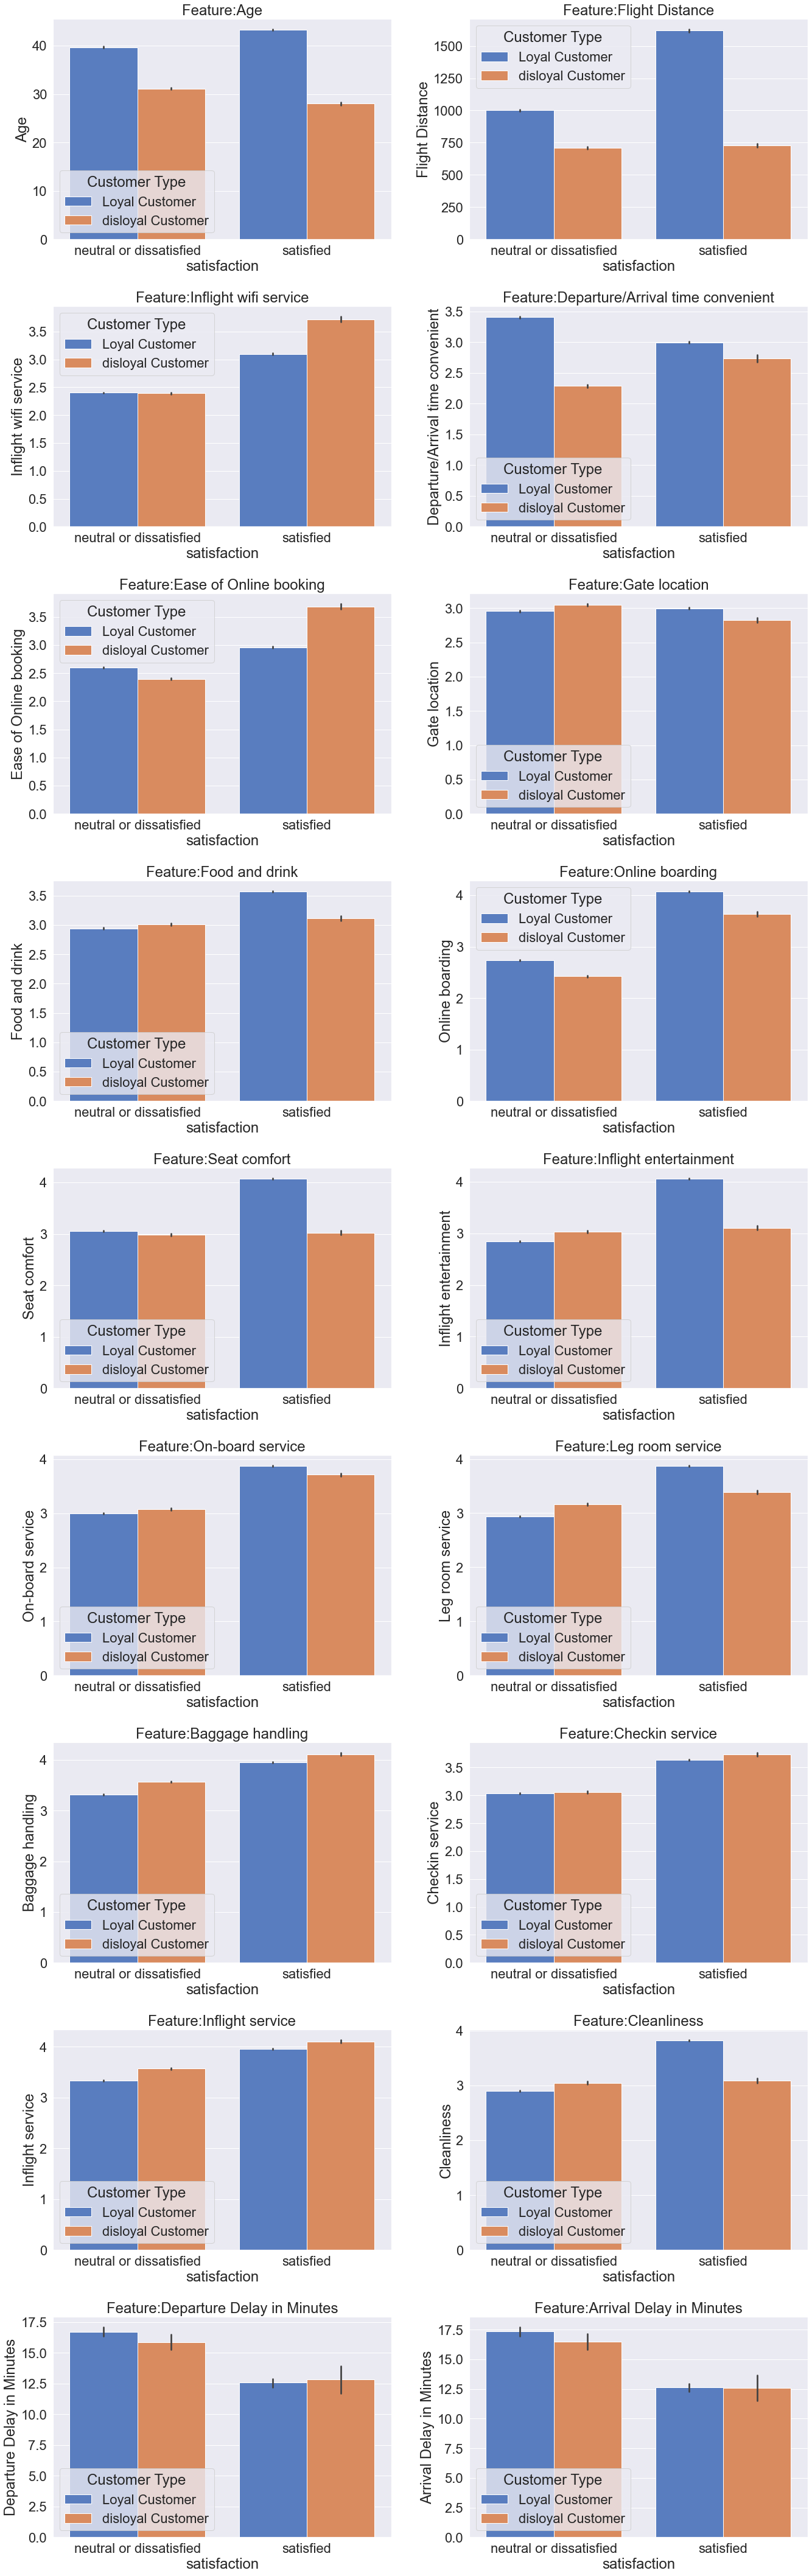

In [237]:
detail_barplot("Customer Type")

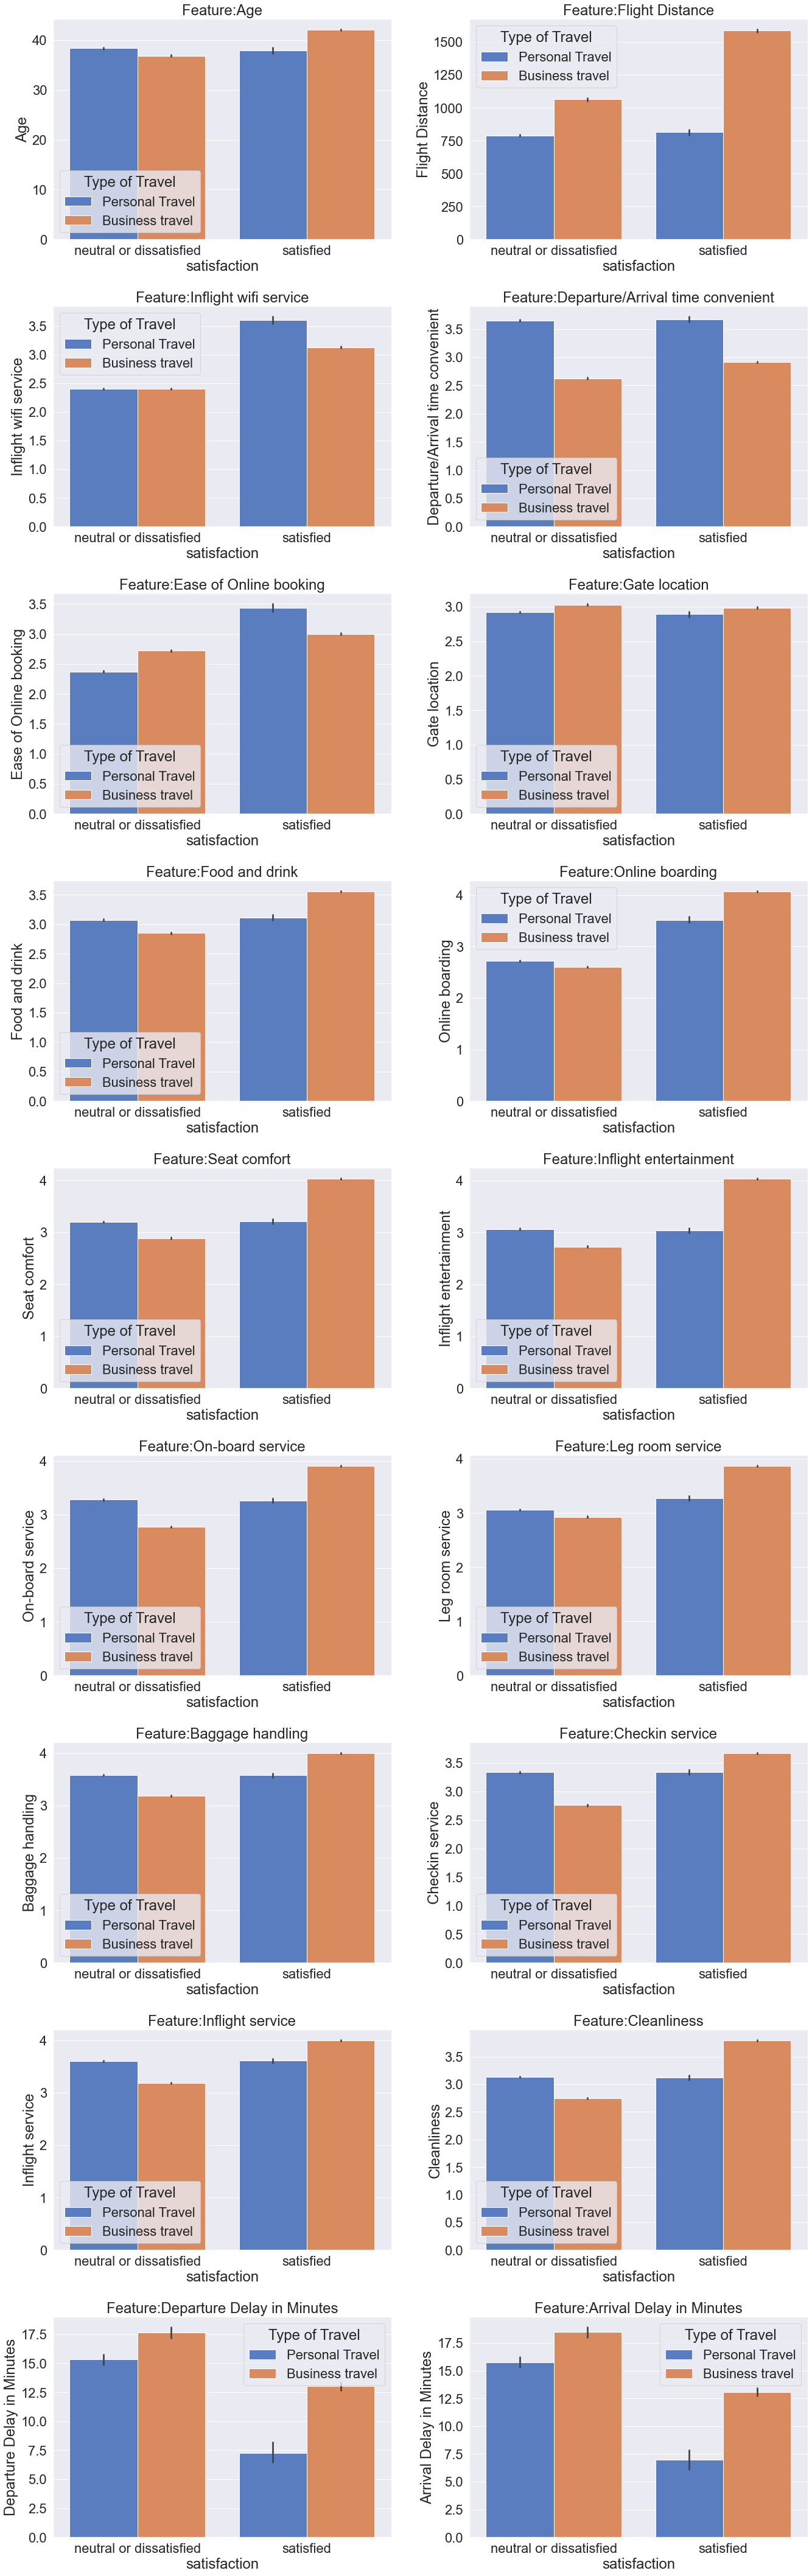

In [238]:
detail_barplot("Type of Travel")

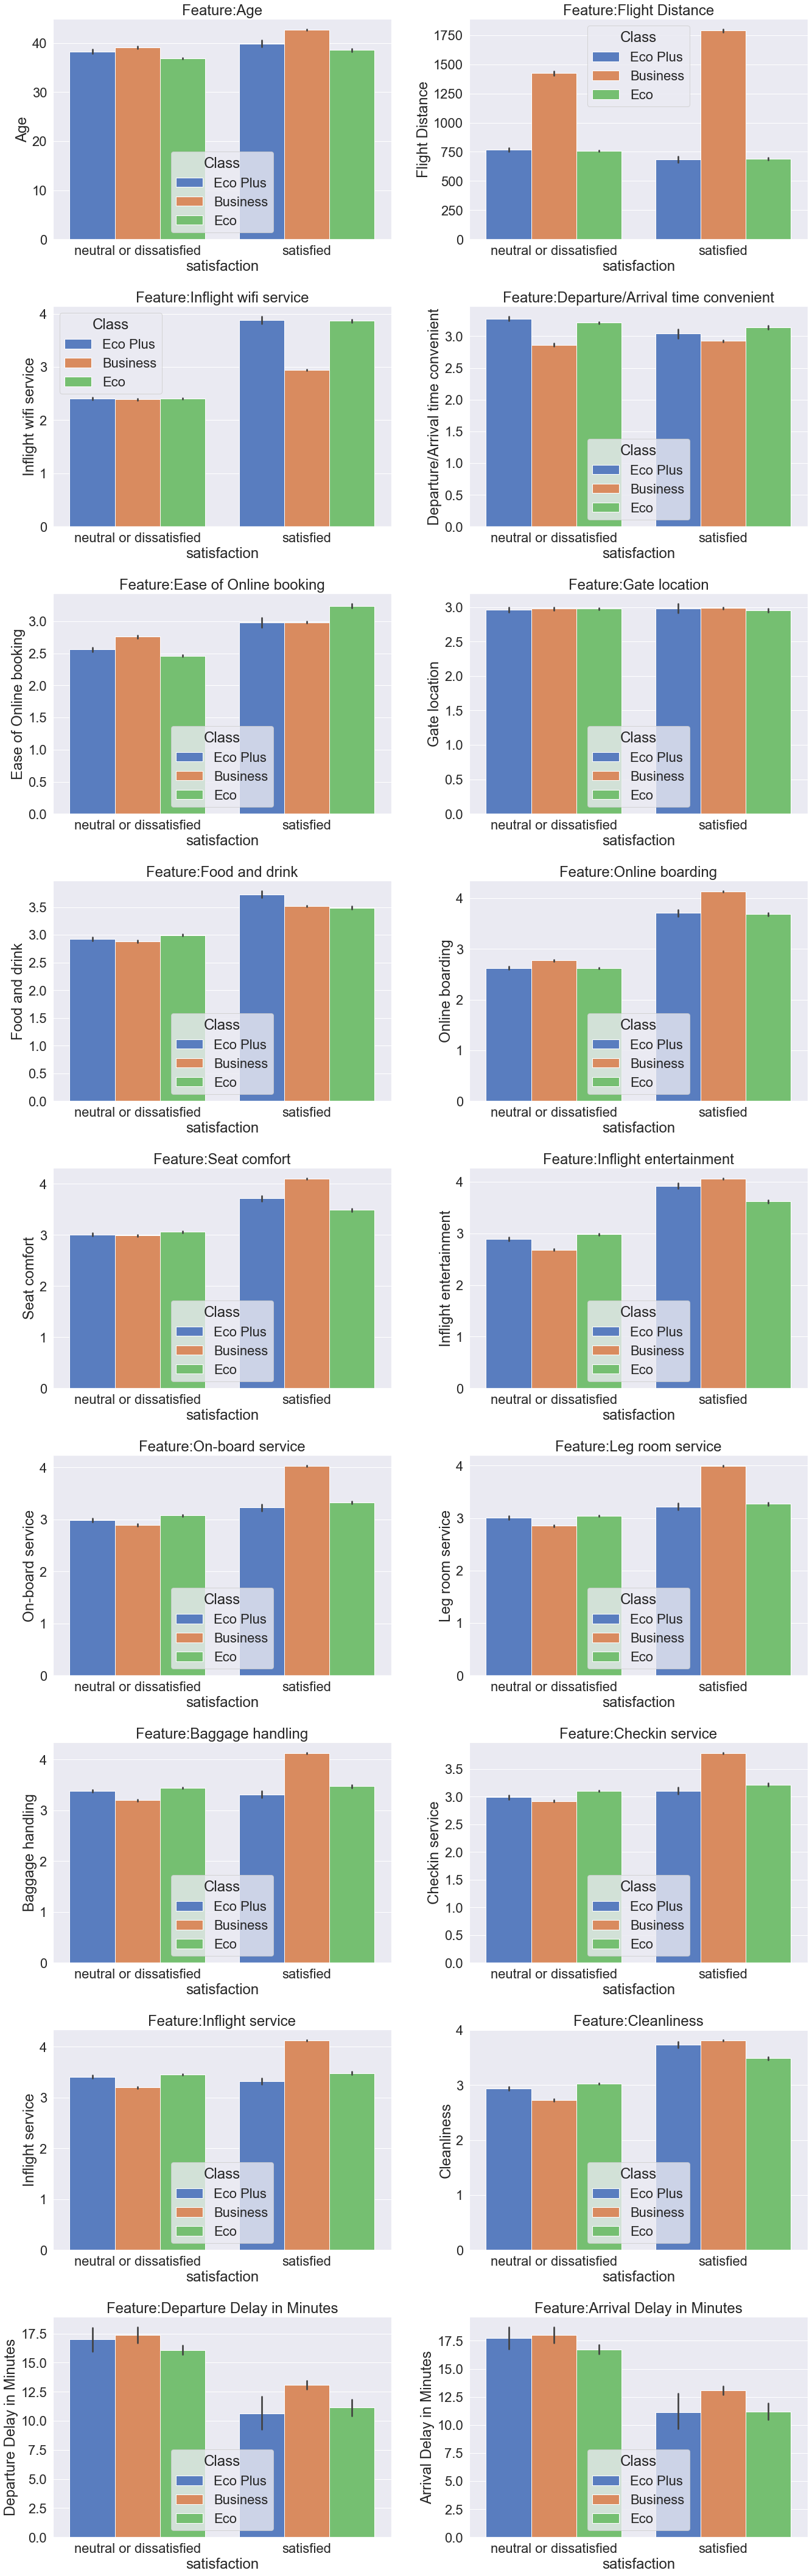

In [239]:
detail_barplot("Class")

## Data Pre-processing

In [240]:
for cat in train_cat_col:
    le = LabelEncoder()
    df_train[cat] = le.fit_transform(df_train[cat])
    df_test[cat] = le.fit_transform(df_test[cat])


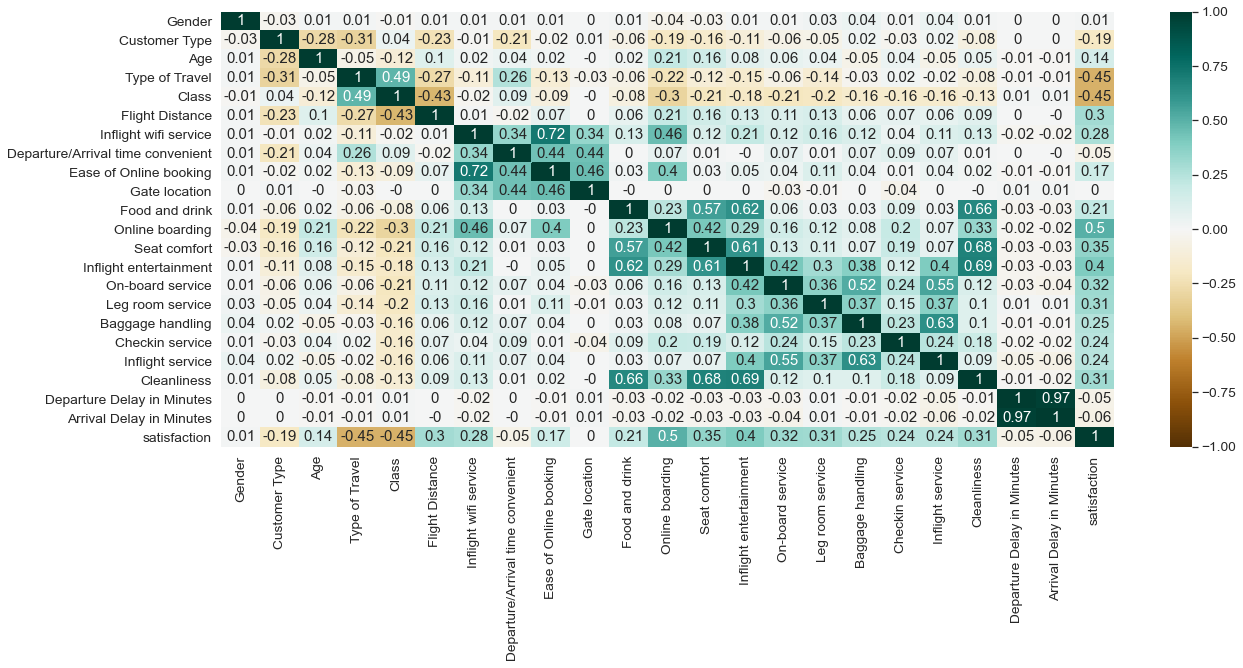

In [241]:
plt.figure(figsize=(20, 8))
sns.set(font_scale = 1.25)
ax = sns.heatmap(df_train.corr().round(2),vmin=-1, vmax=1, annot=True, cmap='BrBG')

In [242]:
imputer = KNNImputer(n_neighbors=10, weights="uniform")

x_train = df_train.iloc[:,:-1]
x_train = imputer.fit_transform(x_train)
y_train = df_train.iloc[:,-1].to_numpy()

x_test = df_test.iloc[:,:-1]
x_test = imputer.fit_transform(x_test)
y_test = df_test.iloc[:,-1].to_numpy()

x_scaler = MinMaxScaler()
x_train = x_scaler.fit_transform(x_train)
x_test = x_scaler.fit_transform(x_test)

## Implement the models

In [243]:
rf_clf = RandomForestClassifier()
lda_clf = LinearDiscriminantAnalysis()
svm_clf = SVC()
logisreg_clf = LogisticRegression()
GB_clf = GradientBoostingClassifier()
XGB_clf = XGBClassifier()
GNB_clf = GaussianNB()
    
clf_list = [rf_clf,lda_clf,svm_clf,logisreg_clf,GB_clf,XGB_clf,GNB_clf]
clf_name_list = ['random_forest','LDA','SupportVectorMachine','LogisticRegression','GradientBoosting','XGBoost','GaussianNaiveBayes']

for clf in clf_list:
    clf.fit(x_train,y_train)

[15:07:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [244]:
# #Hyperparameter tuning list

# rf_clf_para = {"n_estimators":[10,20,30],
#             "max_features":["auto", "sqrt", "log2"],
#             "min_samples_split":[2,4,8],
#             "bootstrap":[True, False],
#             'criterion':['gini', 'entropy', 'log_loss']}

# lda_clf_para = {'solver':['svd','lsqr','eigen'],
#                'shrinkage':list(np.arange(0, 1, 0.01))}

# svm_clf_para = {'C': [0.1,1, 10, 100],
#                 'gamma': [1,0.1,0.01,0.001],
#                 'kernel': ['rbf', 'sigmoid']}

# logisreg_clf_para = {'penalty':['l1', 'l2', 'elasticnet', 'none'],
#                     'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
#                     "C":list(np.logspace(-3,3,7))}

# GB_clf_para = { "subsample":[0.1,0.25,0.5, 0.75, 1],
#               "max_depth":[1,2, 6, 12],
#               "learning_rate":[0.1,0.2,0.3, 0.1, 0.03],
#               "n_estimators":[25,50,100]
#                 }

In [245]:
# rf_clf_tuned= GridSearchCV(rf_clf,rf_clf_para,n_jobs=-1,verbose=1, scoring='accuracy')
# rf_clf_tuned.fit(x_train,y_train)

# lda_clf_tuned= GridSearchCV(lda_clf,lda_clf_para,n_jobs=-1,verbose=1, scoring='accuracy')
# lda_clf_tuned.fit(x_train,y_train)

# svm_clf_tuned= GridSearchCV(svm_clf,svm_clf_para,verbose=1,n_jobs=-1, scoring='accuracy')
# svm_clf_tuned.fit(x_train,y_train)

# logisreg_clf_tuned= GridSearchCV(logisreg_clf,logisreg_clf_para,n_jobs=-1,verbose=1, scoring='accuracy')
# logisreg_clf_tuned.fit(x_train,y_train)

# GB_clf_tuned= GridSearchCV(GB_clf,GB_clf_para,n_jobs=-1,verbose=1,scoring="accuracy")
# GB_clf_tuned.fit(x_train,y_train)

# tuned_clf_list = [rf_clf_tuned,lda_clf_tuned,svm_clf_tuned,logisreg_clf_tuned,GB_clf_tuned]

In [246]:
train_acc_list = []
test_acc_list = []

for clf,name in zip(clf_list,clf_name_list):
    
    y_pred_train = clf.predict(x_train)
    y_pred_test = clf.predict(x_test)
    
    print('***************************************************************************')
    print(name,': \n')

    print('Training part:')
    print(classification_report(y_train, y_pred_train,
                                    target_names=['neutral or dissatisfaction', 'satisfaction']))
    print('Testing part:')
    print(classification_report(y_test, y_pred_test,
                                    target_names=['neutral or dissatisfaction', 'satisfaction']))
        
    train_acc_list.append(accuracy_score(y_train, y_pred_train))
    test_acc_list.append(accuracy_score(y_test, y_pred_test))

***************************************************************************
random_forest : 

Training part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       1.00      1.00      1.00     58879
              satisfaction       1.00      1.00      1.00     45025

                  accuracy                           1.00    103904
                 macro avg       1.00      1.00      1.00    103904
              weighted avg       1.00      1.00      1.00    103904

Testing part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.95      0.98      0.96     14573
              satisfaction       0.97      0.93      0.95     11403

                  accuracy                           0.96     25976
                 macro avg       0.96      0.96      0.96     25976
              weighted avg       0.96      0.96      0.96     25976

*******************************************************

## Models evaluation and selection

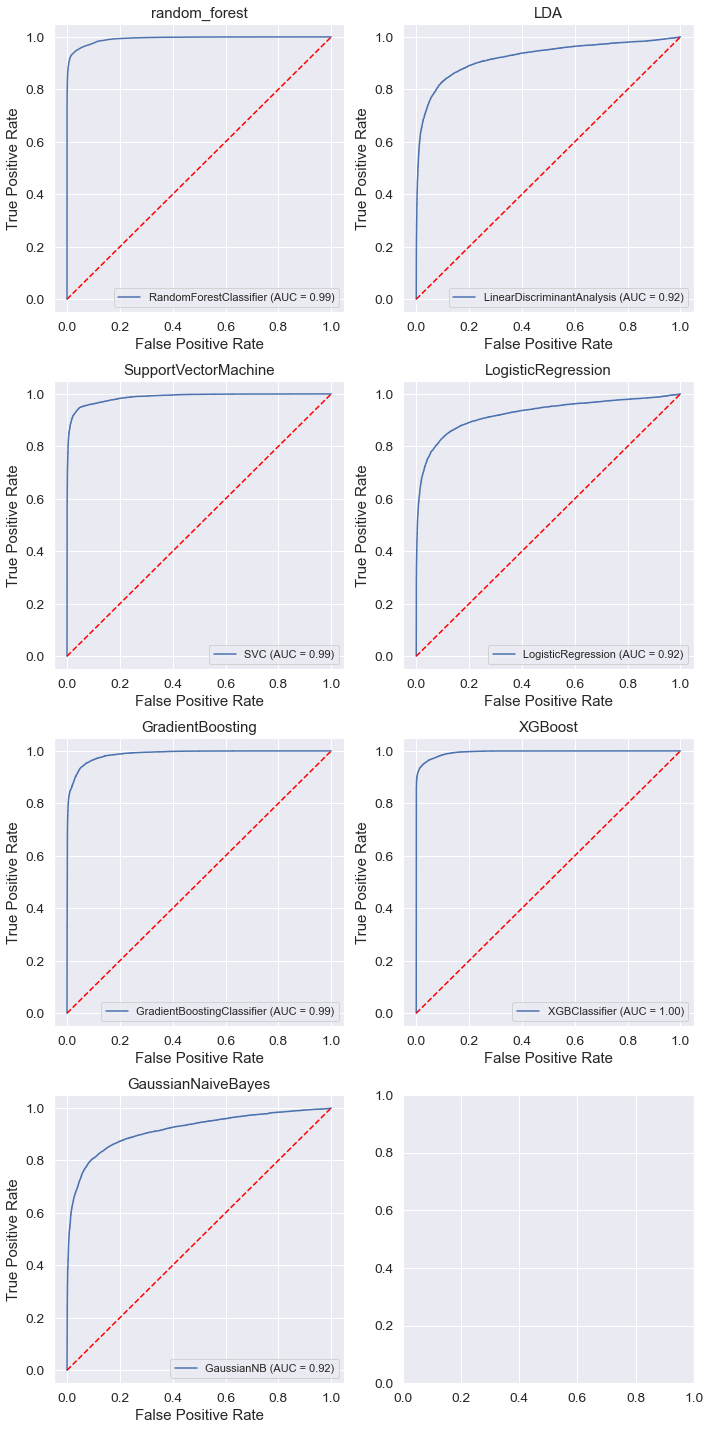

In [247]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10,20))
line = np.linspace(0,1)


sns.set(font_scale=1.0)
for clf, ax,name in zip(clf_list, axes.flatten(),clf_name_list):
    plot_roc_curve(clf, x_test, y_test, ax=ax)
    ax.plot(line, line, color='red', linestyle='dashed')
    ax.title.set_text(name)
fig.tight_layout(pad=1.0)
plt.show()

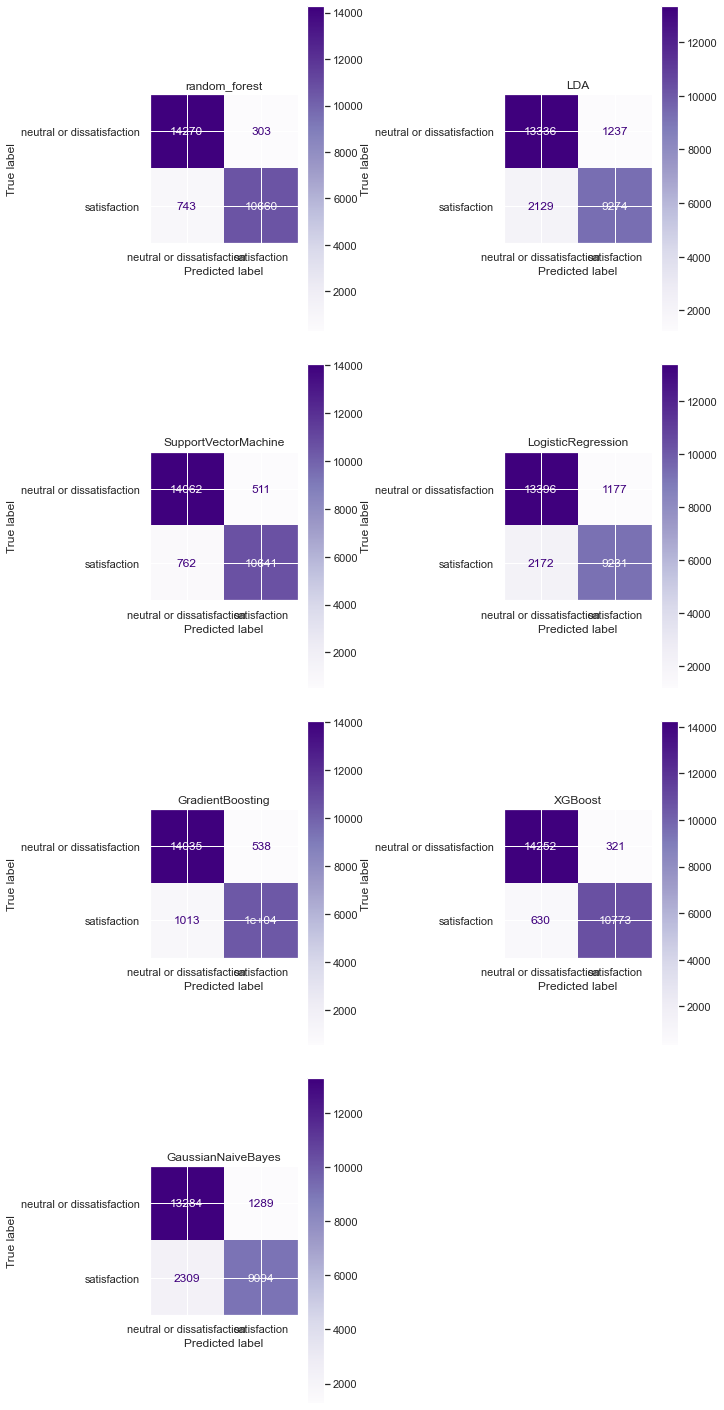

In [248]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10,20))

sns.set(font_scale=1)

for clf, ax,name in zip(clf_list, axes.flatten(),clf_name_list):
    plot_confusion_matrix(clf, x_test, y_test, ax=ax, cmap='Purples',
                          display_labels=['neutral or dissatisfaction', 'satisfaction'])  
    
    ax.title.set_text(name)
    plt.grid(False)
fig.tight_layout(pad=1)
fig.delaxes(axes[3][1])
plt.show()

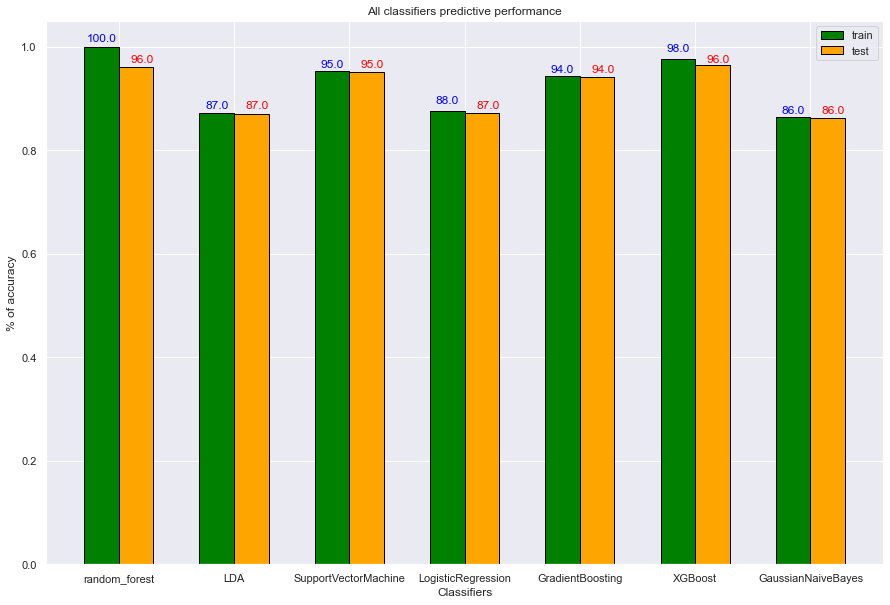

In [249]:
plt.figure(figsize=(15,10))

n = np.arange(7)
width = 0.3

plt.bar(n, train_acc_list, color = 'green',
        width = width, edgecolor = 'black',
        label='train')
for i in range(len(train_acc_list)):
        plt.text(i,train_acc_list[i].round(2)+0.01,train_acc_list[i].round(2)*100,
                 ha = 'center',color = 'blue')

plt.bar(n + width, test_acc_list, color = 'orange',
        width = width, edgecolor = 'black',
        label='test')

for i in range(len(test_acc_list)):
        plt.text(i+0.25,test_acc_list[i].round(2)+0.01,test_acc_list[i].round(2)*100,color = 'red')

plt.xlabel("Classifiers")
plt.ylabel("% of accuracy")
plt.title("All classifiers predictive performance")
  
plt.xticks(n + width/2,clf_name_list)
plt.legend()
  
plt.show()

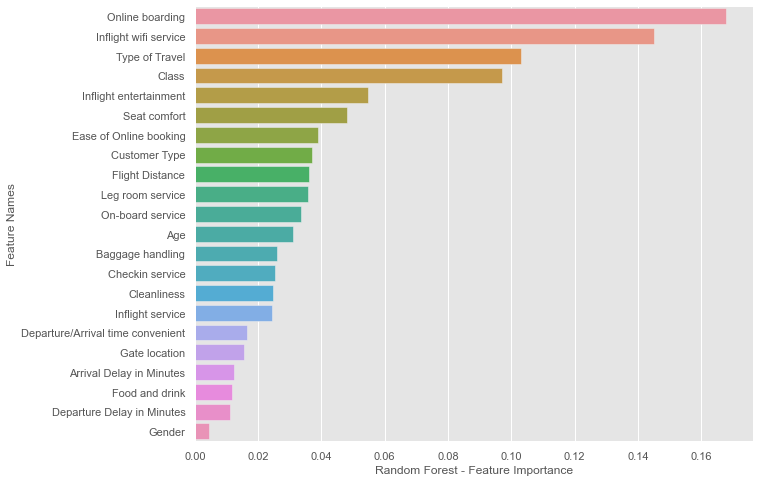

In [255]:
feature_importance = clf_list[0].feature_importances_
col_name = df_train.iloc[:,:-1].columns
rf_fi ={'feature_names':col_name,'feature_importance':feature_importance}

df_plt = pd.DataFrame(rf_fi)
df_plt.sort_values(by=['feature_importance'], ascending=False,inplace=True)

plt.figure(figsize=(10,8))
sns.barplot(x=df_plt['feature_importance'], y=df_plt['feature_names'])
#plt.style.use("ggplot")
plt.xlabel('Random Forest - Feature Importance')
plt.ylabel('Feature Names')
plt.show()


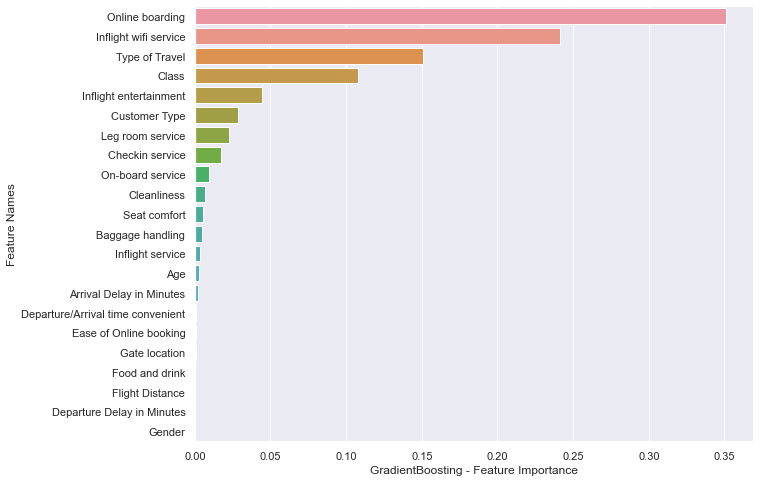

In [251]:
feature_importance = clf_list[-3].feature_importances_
col_name = df_train.iloc[:,:-1].columns
rf_fi ={'feature_names':col_name,'feature_importance':feature_importance}

df_plt = pd.DataFrame(rf_fi)
df_plt.sort_values(by=['feature_importance'], ascending=False,inplace=True)

plt.figure(figsize=(10,8))
sns.barplot(x=df_plt['feature_importance'], y=df_plt['feature_names'])
plt.style.use("ggplot")
plt.xlabel('GradientBoosting - Feature Importance')
plt.ylabel('Feature Names')
plt.show()

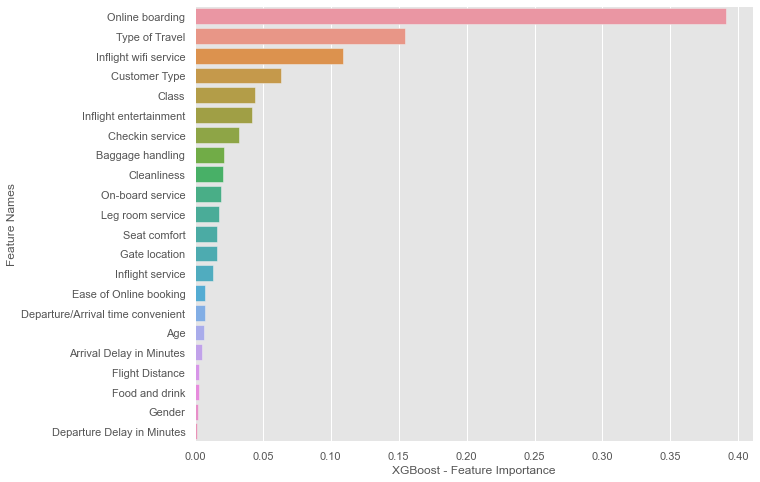

In [252]:
feature_importance = clf_list[-2].feature_importances_
col_name = df_train.iloc[:,:-1].columns
rf_fi ={'feature_names':col_name,'feature_importance':feature_importance}

df_plt = pd.DataFrame(rf_fi)
df_plt.sort_values(by=['feature_importance'], ascending=False,inplace=True)

plt.figure(figsize=(10,8))
sns.barplot(x=df_plt['feature_importance'], y=df_plt['feature_names'])
plt.style.use("ggplot")
plt.xlabel('XGBoost - Feature Importance')
plt.ylabel('Feature Names')
plt.show()

## Implement the Deep Neural Network 

In [253]:
dnn_model = Sequential()
dnn_model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
dnn_model.add(Dense(512, activation='relu'))
dnn_model.add(Dense(512, activation='relu'))
dnn_model.add(Dense(512, activation='relu'))
dnn_model.add(Dense(1, activation='sigmoid'))

dnn_model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
history = dnn_model.fit(x_train, y_train, epochs=10, batch_size=256,validation_data=(x_test,y_test))

Epoch 1/10
406/406 [==============================] - 5s 11ms/step - loss: 0.1932 - accuracy: 0.9207 - val_loss: 0.1374 - val_accuracy: 0.9444
Epoch 2/10
406/406 [==============================] - 4s 11ms/step - loss: 0.1197 - accuracy: 0.9494 - val_loss: 0.1175 - val_accuracy: 0.9501
Epoch 3/10
406/406 [==============================] - 4s 11ms/step - loss: 0.1090 - accuracy: 0.9541 - val_loss: 0.1079 - val_accuracy: 0.9555
Epoch 4/10
406/406 [==============================] - 4s 11ms/step - loss: 0.1045 - accuracy: 0.9556 - val_loss: 0.1026 - val_accuracy: 0.9558
Epoch 5/10
406/406 [==============================] - 4s 11ms/step - loss: 0.0972 - accuracy: 0.9584 - val_loss: 0.0985 - val_accuracy: 0.9580
Epoch 6/10
406/406 [==============================] - 4s 11ms/step - loss: 0.0944 - accuracy: 0.9593 - val_loss: 0.1107 - val_accuracy: 0.9527
Epoch 7/10
406/406 [==============================] - 4s 11ms/step - loss: 0.0976 - accuracy: 0.9593 - val_loss: 0.1020 - val_accuracy: 0.9563

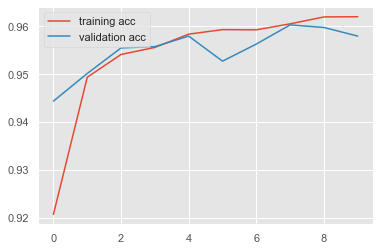

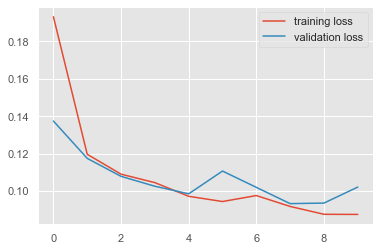

In [254]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, label='training acc')
plt.plot(epochs, val_acc, label='validation acc')
plt.legend()
plt.figure()

plt.plot(epochs, loss, label='training loss')
plt.plot(epochs, val_loss, label='validation loss')
plt.legend()